# Data Parsing and Exploratory Analysis
Jana Bruses | janabruses@pitt.edu | University of Pittsburgh | Feb. 23rd - Mar. 23rd 2025\

This is the NEW REPLACEMENT of Data Parsing and Exploratory Analysis 1

## 1. A few data considerations
Citing Montoya Abat and Mas I Miralles’ notes in Linguistic Variation, “written language always represents a later stage than the actual appearance of any linguistic phenomenon, since the written text incorporates innovations when in oral expression they have already been occurring for some time.” They further add that in written language, “the appearance of occurrences tends to be considerably reduced.” That is because standardization tends to substantially influence written language more, particularly in literary works, which go through multiple reviews before publication.

In this regard, since we are examining language variation, spoken data would likely provide the best approach for identifying traces of Catalan’s substitution. However, as we need our data to span a sufficiently long timeframe to capture changes and differences, finding open-spoken resources from earlier periods is highly challenging. Therefore, we will work with the closest approximation to spoken data: transcribed speeches, plenary sessions, and other written records derived from spoken works.

Not finding a Catalan corpora covering a timespan over 15 years. We will be using multiple corpora that fulfill the points mentioned above. 

In chronological order, these are:

1) **CTIC(1832-1926)**\
Corpora originally contained texts published between 1832 and 1988 and expanded to recent works after 2015. Created to develop the descriptive dictionary of the Catalan language known as DDLC. Part of the corpora has been made available for public use. Only those works that are no longer subject to copyright in Spain are being made public work by work in single text files.\
The downloadable corpora consists of 337 files of literary works and 596 non-literary texts, all published before 1985.\
Out of these works, we’ll be using 28 speech-delivered texts, specifically speeches.

2) **Parlament Parla (2007-2018)**\
Speech corpus by Col·lectivaT containing Catalan Parliament (Parlament de Catalunya) plenary sessions from 2007 to 2018.\
Transcriptions have been aligned with the recordings and the corpora extracted.\
Corpora comprises 211 hours of clean and 400 hours of other quality segments, where each speech segment is tagged with its speaker the speaker’s gender.

3) **ParlaMint-ES-CT (2015-2022)**\
ParlaMint-ES-CT is the Spanish and Catalan parliamentary corpora covering from 2015 to 2022 as part of the corpora project ParlaMint: Comparable Parliamentary Corpora. The full corpora contains compiled subcorpora from 29 countries and autonomous regions in original languages, as well as machine translations to English.

4) **Radioteca.cat (1960-2025)**\
Web library of over 300.000 IA-transcribed radio programs and summaries.\
It is a personal project by Xavier Drudis, containing data from the 1960s to 2025.\
This data was incorporated into the project after noticing a huge data gap between 1985 and 2007.\
Hence, it was incorporated less purposely and more out of need. That is because, while it is consistent with the overall data being from spoken or speech-derived texts, it is the least close in terms of genre.\
The previous corpora all came from more formal speech content, parliamentary and plenary sessions, ceremonial speeches, etc. Radio shows are less formal and less professional speech.\

## 2. Data processing

The data processing procedure for each of the corpora in chronological order follows:\
Each corpus is processed and analyzed through a general Exploratory Data Analysis using the following function and then through corpus-specific analysis.\
Then, the corpora are assembled all together with section [2.5](#2.5-Jointly), where all the data is put together and explored in an overall EDA. 

**2.1** [CTILC](#2.1-CTILC)\
**2.2** [Parlament Parla](#2.2-Parlament-Parla)\
**2.3** [ParlaMint](#2.3-ParlaMint-ES-CT)\
**2.4** [Radioteca](#2.4-Radioteca.cat)\
**2.5** [All data jointly](#2.5-Jointly)

In [3]:
def generalEDA(dataframe, corpus_name):
    '''
    Function to run general Exploration Data Analysis
    Takes in the pandas dataframe and its name
    Prints out its:
        shape
        info
        column names
        corpora length
        timeframe (if time metadata is avaliable)
        description     
        timeline visualization (if time metadata is avaliable) 
    '''
    print("--- EDA", corpus_name, "---")
    print("The dataframe has:",
          dataframe.shape[0], "rows",
          dataframe.shape[1], "columns", "\n")
    print("Dataframe's info is:")
    print(dataframe.info(), "\n")
    print("The Dataframe's", len(dataframe.columns), "columns are:", "\n", dataframe.columns, "\n")
    dataframe["Text_len"] = dataframe["Text"].apply(len)
    print("The total length of the Dataframe excluding the metadata is:", "\n", dataframe["Text_len"].sum(), "\n")
    key_word = None
    if "Date" in dataframe.columns:
        key_word = "Date" # for plotting later
        print("The data ranges from", dataframe["Date"].min(), "to", dataframe["Date"].max(), "\n")
    if "Year" in dataframe.columns:
        key_word = "Year" # for plotting later
        print("The data ranges from", dataframe["Year"].min(), "to", dataframe["Year"].max(), "\n")
    print("The description of the dataframe is:", "\n",
          dataframe.describe(), "\n", "\n")

    if key_word:
        # extacting unique years and sorting them
        if corpus_name == "ParlaMint":
            years = sorted((parlaMint_df[key_word].apply(lambda x :x[0:7])).unique())
        if corpus_name == "Radioteca.cat":
            years = sorted((radioteca_df["Date"].unique()))
        if corpus_name == "CTILC": 
            years = sorted(CTILC_df[key_word].unique())
        

        # create place holder for y-values 
        y_values = [1] * len(years)  # Place all points at y=1

        # Plot each year as a point on the timeline
        fig, ax = plt.subplots(figsize=(12, 2)) 
        ax.scatter(years, y_values, color="blue", marker="o")

        # formatting
        ax.set_xlabel(key_word)
        ax.set_yticks([])  
        ax.set_title("Document Timeline")
        ax.grid(axis="x") 
        plt.xticks(rotation=90)

        plt.show()

### 2.1 CTILC

The files are .txt, so we will parse them using plain text corpus reader.\
Their encoding is UTF-8 with FL line terminator, so they align with our encoding and line termination preference.\
No changes are required.

In [4]:
#importing nltk's plain text corpus reader
from nltk.corpus.reader import PlaintextCorpusReader

corpus_root = "data/CTILC/tots"
corpus = PlaintextCorpusReader(corpus_root, r".*\.txt")

#print(corpus.fileids())  # getting filenames to get a file
print(corpus.raw("001858_Discurs_llegit_en_lo_Certamen_Catalanist.out.txt")[:1000])  # taking a look at part of one of the files

<DOCUMENT>
<OBRA id="1858">
<AUTOR>Sagarra i de Siscar, Ferran de</AUTOR>
<TÍTOL>Discurs llegit en lo Certamen Catalanista de la Joventut Católica de Barcelona</TÍTOL>
<ANY>1891</ANY>
<CLASSIFICACIÓ_TEXTUAL llengua="NLIT" gènere="" tema="2" subtema="2.7" traducció="no" variant="central" />
</OBRA>
<TEXT>Discurs llegit en lo certamen catalanista de la joventut católica de Barcelona

Excm. é Ilm. Sr. Senyors: Quan en Bonaventura Carles Aribau, al començarse lo segon terç de la presént centuria, ab aquell Adéu á la patria, plé de sentiment y tendresa, y ab aquell recort per la llengua en que soná son primer vagit quan del mugró matern la dolça llet bebia, iniciava lo modern renaxement de nostra literatura, ¿qui ho havia de dir, que en breu espay de temps, poetas y prosadors conqueririan tants llors pera les lletres catalanes? Y ab tot, no sols fou axí, sino que ab la remembrança de antigues gestes, al fer reviure grans homens y fets del llibre d' or de nostra historia, se despertá en nosa

**Comment:**\
There is some metadata mixed which might actually be very useful.
Therefore, we will change the approach and parse the CTILC data as an xml and store it as a pandas dataframe, where the id, author, title, date and other metadata will be strored in columns.\
The text will be given its own column.

In [5]:
#importing BS, Pandas, NumPy (for NaN values) and Regex
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re

CTILC_data = []

for file in corpus.fileids():   
    soup = BeautifulSoup(corpus.raw(file), "html.parser")
    data = {}  # dictionary for each file

    # "obra" ID (CAT) / work ID (ENG) - we will use ID for short
    obra_tag = soup.find("obra") 
    data["ID"] = obra_tag["id"] if obra_tag and obra_tag.has_attr("id") else np.nan 

    # "autor" (CAT) / Author (ENG) 
    data["Author"] = soup.find("autor").text if soup.find("autor") else np.nan

    # "títol" (CAT) / Title (ENG)
    data["Title"] = soup.find("títol").text if soup.find("títol") else np.nan

    # "any" (CAT) / Year (ENG)
    data["Year"] = soup.find("any").text if soup.find("any") else np.nan

    # "text" (CAT) / "Text" (ENG) - where we will store the content of the files, the non-metadata, the meat
    data["Text"] = soup.find("text").text if soup.find("text") else np.nan
    #in the text the title begins the content, we will get rid of it as we can find a "\n\n" separator between the title and the content
    data["Text"] = re.sub(r".*?\n\n(?=\S)", "", data["Text"], count = 1, flags=re.DOTALL)

    CTILC_data.append(data)

# creating Pandas df
CTILC_df = pd.DataFrame(CTILC_data)

#taking a look at the head of the CTILC data frame
CTILC_df.head()

,ID,Author,Title,Year,Text
0,766,"Serra i Pagès, Rossend",Discurs llegit per... donar a conèxer la perso...,1926,"L'home que per amor al estudi, impulsat per un..."
1,1100,"Millet i Pagès, Lluís",Parlament llegit en la festa inaugural de l'Or...,1920,"Cantaires de la Garriga, Senyores i senyors:\n..."
2,1664,"Miró i Borràs, Oleguer",Discurs-pròlec,1900,Discurs-prolec Llegit en la societat mèdic-far...
3,1784,"Balari i Jovany, Josep",Discurs,1894,"Senyors excelentissims, senyors:\n\nQuan rebí ..."
4,1820,"Torras i Ferreri, Cèsar August",Discurs,1903,"Senyors:\n\nSembla que era air, y fa ja uns qu..."


--- EDA CTILC ---
The dataframe has: 28 rows 5 columns 

Dataframe's info is:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      28 non-null     object
 1   Author  28 non-null     object
 2   Title   28 non-null     object
 3   Year    28 non-null     object
 4   Text    28 non-null     object
dtypes: object(5)
memory usage: 1.2+ KB
None 

The Dataframe's 5 columns are: 
 Index(['ID', 'Author', 'Title', 'Year', 'Text'], dtype='object') 

The total length of the Dataframe excluding the metadata is: 
 721938 

The data ranges from 1860 to 1926 

The description of the dataframe is: 
            Text_len
count     28.000000
mean   25783.500000
std    14946.550472
min     9178.000000
25%    15676.500000
50%    21784.000000
75%    32158.750000
max    73881.000000 
 



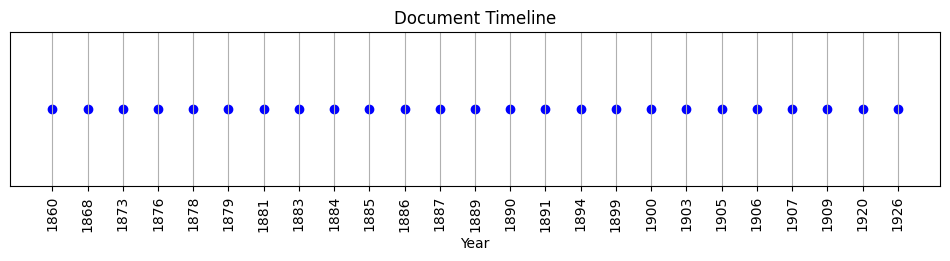

In [6]:
import matplotlib.pyplot as plt

generalEDA(CTILC_df, "CTILC")

In [7]:
# other EDA
print()
print(CTILC_df["Author"].value_counts()[0:5])
print()
CTILC_df["Decade"] = CTILC_df["Year"].apply(lambda x :x[-2]+"0")
CTILC_df["Decade"].value_counts()


Author
Serra i Pagès, Rossend               2
Monserdà, Dolors                     2
Querol i Campos, Vicent Wenceslau    1
Picó i Campamar, Ramon               1
Ubach i Vinyeta, Francesc            1
Name: count, dtype: int64



Decade
80    8
00    6
90    5
70    5
20    2
60    2
Name: count, dtype: int64

In [8]:
# storing CTILC dataframe as a pickle
CTILC_df.to_pickle("CTILC.pkl")

**Exploratory Analysis Summary:**\
After parsing the data and turining it into a pandas data frame, the CLTIC data frame has 5 columns.\
Out of the 5, four of the columns correspond to the metadata, specifically the works' ID, the author of the text, its title and year of publication.\
The fifth column is the content of the work, in other words the text.\
The oldest work from the CLTIC copora is from 1860, and the most recent from 1926.\
The total length, and hence the amount of data we have in total from the CLTIC corpora is about 700,000 characters.\
These come from different length texts, as we find that the shortest participates to the total with over 9,000 word characters, and the longest with about 70,000 characters.\
The average length of the 28 texts our subset of the corpora contains is about 25,000 characters per text.\
Covering the over 65 years time-span the texts are not evenly spread. We find a bigger representation of the years closer to the century change. As the 1880s and the 1900s are the 2 most represented centuries in that order. Followed by the 1890s and 1870s, which both are represented with 5 texts. The 1860s and 1920s, the two ends of the time-span are the least represented with 2 texts each. Not represented at all we find the 1910s. However, as we see in the timeline plot many of the 1900s texts are from the late 1900s, including texts from the 1907 and 1909. It is descently spread and gives us descent coverage of the time-span.\
The maximum amount of texts included in the corpora written by the same author is at a maximum of two, and just for two authors, which allows us to make inferences without being tripped by the specific authors' styles, or having a same style and author influence or become a bias of the time-span's data. 

### 2.2 Parlament Parla

The files are .tsv, so we will parse them using Pandas.\
Their encoding is UTF-8 but CRFL line terminators, that were converted to FL line terminators using dos2unix on terminal.

In [9]:
# loading data and creating a Pandas dataframe:

In [10]:
def partition_reading(path):
    '''
    Function takes in a path and returns a dataframe containing:
        1) the content of the tsv file
        2) a column with the partition extracted from the 4th to 15th character of the path starting from the back
    '''
    df = pd.read_csv(path,  sep="\t", header = 0)
    df["Partition"] = path[-15:-4]
    return df

In [11]:
# importing os
import os
#corpus_root = "dataCAT/ParlamentParla"

#reading in each of the partitions and turning them into separate data frames
clean_tr = partition_reading("data/ParlamentParla/clean_train.tsv")
clean_dev = partition_reading("data/ParlamentParla/clean_dev.tsv")
clean_ts = partition_reading("data/ParlamentParla/clean_test.tsv")
other_dev = partition_reading("data/ParlamentParla/other_dev.tsv")
other_ts = partition_reading("data/ParlamentParla/other_test.tsv")

#merging data frames in a single dataframe through concatenation
parlament_parla_df = pd.concat([clean_tr, clean_dev, clean_ts, other_dev, other_ts])
parlament_parla_df.columns = ["Speaker_id", "Path", "Text", "Gender", "Duration", "Partition"]

#taking a look at part of the dataframe
parlament_parla_df.head()

,Speaker_id,Path,Text,Gender,Duration,Partition
0,164,clean_train/3/1/31ca4d158eaef166c37a_18.87_23....,perquè que el president de catalunya sigui reb...,M,4.71,clean_train
1,164,clean_train/3/1/31ca4d158eaef166c37a_60.13_65....,que lliga absolutament amb allò que vostè diu ...,M,5.50,clean_train
2,336,clean_train/2/8/2803008bb00cb0c86de6_17.0_30.1...,gràcies presidenta consellera atès l'inici del...,M,13.15,clean_train
3,336,clean_train/2/8/2803008bb00cb0c86de6_31.03_44....,li volem preguntar si el seu departament té pr...,M,13.02,clean_train
4,336,clean_train/2/8/2803008bb00cb0c86de6_44.74_53....,per tal d'iniciar la recuperació de l'ensenyam...,M,8.49,clean_train


In [12]:
generalEDA(parlament_parla_df, "Parlament Parla")

--- EDA Parlament Parla ---
The dataframe has: 87424 rows 6 columns 

Dataframe's info is:
<class 'pandas.core.frame.DataFrame'>
Index: 87424 entries, 0 to 1898
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Speaker_id  87424 non-null  int64  
 1   Path        87424 non-null  object 
 2   Text        87424 non-null  object 
 3   Gender      87424 non-null  object 
 4   Duration    87424 non-null  float64
 5   Partition   87424 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.7+ MB
None 

The Dataframe's 6 columns are: 
 Index(['Speaker_id', 'Path', 'Text', 'Gender', 'Duration', 'Partition'], dtype='object') 

The total length of the Dataframe excluding the metadata is: 
 13174757 

The description of the dataframe is: 
          Speaker_id      Duration      Text_len
count  87424.000000  87424.000000  87424.000000
mean     184.029866      9.135149    150.699545
std      104.624795      3.26

In [13]:
# dataframe-specific EDA
print(parlament_parla_df["Gender"].value_counts())
print()

Gender
M    53220
F    34204
Name: count, dtype: int64



In [14]:
# storing parlament-parla dataframe as a pickle
parlament_parla_df.to_pickle("parlaparla.pkl")

**Exploratory Analysis Summary:**\
After parsing the data and turining it into a pandas dataframe, the Parlament Parla data frame has 6 columns.\
Out of the 6, five of the columns correspond to the metadata. Provided by the resource itself we find 4 metadata columns: the speaker id, the path of the corresponding sound, the gender of the speaker and the duration of the audio file the transcription corresponds to. Also as metadata, we find the column previously created identifying what partition of the data the audio file content belongs to, te partitions being defined by the folders and then stored as variables in the "Partiction" column of the dataframe.\
The third column, and only non-metadata one, adding up to the 6 total is the transcription of the content of the audio file.\
There is no metadata on when the recording was done nor transcribed.\
The total length, and hence the amount of data we have in total from the Parlament Parla corpora is about 10,000,000 word characters.\
The transcription that contributes with the least amount of data is only 7 word characters long, while the longest is about 670 word characters.\
The average length of the over 87,000 transcriptions is about 150 characters per transcription.\
The genders are not evenly represented on the corpora, but close enough that it shouldn't pose a problem. as both are represented about 10,000 transcriptions off of 40,000 transcriptions.
While it is

### 2.3 ParlaMint-ES-CT

Files are in multiple formats.\
To be consistent with the other datasets, which are less flexible, we'll use:
* tsv documents for the metadata
* txt documents for the text content/transcription

In [15]:
#ParlaMint part 1 - Metadata/tsv
import glob

# defining the path where ParlaMint data is stored
data_path = "data/ParlaMint-ES-CT.ana/ParlaMint-ES-CT.txt"  # Adjust to your directory

# loading all metadata/.tsv files
metadata_files = glob.glob(os.path.join(data_path, "**", "*-meta.tsv"))

# reading in and concatenating all metadata files
metadata = []
for file in metadata_files:
    meta_df = pd.read_csv(file, sep="\t", index_col = False)
    metadata.append(meta_df)

metadata_df = pd.concat(metadata)

# taking a quick look at the metadata dataframe
metadata_df.head()

,Text_ID,ID,Title,Date,Body,Term,Session,Meeting,Sitting,Agenda,...,Speaker_MP,Speaker_minister,Speaker_party,Speaker_party_name,Party_status,Party_orientation,Speaker_ID,Speaker_name,Speaker_gender,Speaker_birth
0,ParlaMint-ES-CT_2022-07-07-3502,ParlaMint-ES-CT_2022-07-07-3502.1.0,"Corpus Parlamentari en català ParlaMint-ES-CT,...",2022-07-07,Unicameralisme,XIV Legislatura,-,35,2,-,...,notMP,notMinister,GP-JxCAT,Grup Parlamentari de Junts per Catalunya,Coalition,Entre centredreta i dreta,BorràsLaura,"Borràs i Castanyer, Laura",F,1970
1,ParlaMint-ES-CT_2022-07-07-3502,ParlaMint-ES-CT_2022-07-07-3502.224.0,"Corpus Parlamentari en català ParlaMint-ES-CT,...",2022-07-07,Unicameralisme,XIV Legislatura,-,35,2,-,...,MP,notMinister,GP-ERC,Grup Parlamentari Esquerra Republicana de Cata...,Coalition,Entre centreesquerra i esquerra,VilaltaMarta,"Vilalta i Torres, Marta",F,1984
2,ParlaMint-ES-CT_2022-07-07-3502,ParlaMint-ES-CT_2022-07-07-3502.2.0,"Corpus Parlamentari en català ParlaMint-ES-CT,...",2022-07-07,Unicameralisme,XIV Legislatura,-,35,2,-,...,notMP,notMinister,GP-JxCAT,Grup Parlamentari de Junts per Catalunya,Coalition,Entre centredreta i dreta,BorràsLaura,"Borràs i Castanyer, Laura",F,1970
3,ParlaMint-ES-CT_2022-07-07-3502,ParlaMint-ES-CT_2022-07-07-3502.3.0,"Corpus Parlamentari en català ParlaMint-ES-CT,...",2022-07-07,Unicameralisme,XIV Legislatura,-,35,2,-,...,notMP,Minister,ERC,Esquerra Republicana de Catalunya,-,Entre centreesquerra i esquerra,VilagràLaura,"Vilagrà Pons, Laura",F,1976
4,ParlaMint-ES-CT_2022-07-07-3502,ParlaMint-ES-CT_2022-07-07-3502.4.0,"Corpus Parlamentari en català ParlaMint-ES-CT,...",2022-07-07,Unicameralisme,XIV Legislatura,-,35,2,-,...,notMP,notMinister,GP-JxCAT,Grup Parlamentari de Junts per Catalunya,Coalition,Entre centredreta i dreta,BorràsLaura,"Borràs i Castanyer, Laura",F,1970


In [16]:
#ParlaMint part 2 - txt/content

# loading all text files
text_files = glob.glob(os.path.join(data_path, "**", "*.txt"), recursive=True)

# reading in and concatenating all text files
text_list = []
for file in text_files:
    if "README" not in file: # avoiding the README.txt getting mixed up with our data
        text_df = pd.read_csv(file, sep="\t", header = None)
        text_list.append(text_df)

text_df = pd.concat(text_list)

# giving name columns ID and Text to the dataframe columns
text_df = text_df.rename(columns ={0: "ID", 1:"Text"})

# taking a quick look at the txt files dataframe
text_df.tail()

,ID,Text
126,ParlaMint-ES-CT_2016-06-09-1802.127.0,"Moltes gràcies, senyor Fernández. A continuaci..."
127,ParlaMint-ES-CT_2016-06-09-1802.128.0,"Gràcies, presidenta. Bon dia. Des de la CUP, e..."
128,ParlaMint-ES-CT_2016-06-09-1802.129.0,"Moltes gràcies, senyora Vehí. A continuació, t..."
129,ParlaMint-ES-CT_2016-06-09-1802.130.0,"Gràcies, presidenta. Vicepresident, consellera..."
130,ParlaMint-ES-CT_2016-06-09-1802.131.0,"Moltes gràcies, senyor Bonvehí. Acabat el deba..."


In [17]:
# let's compare the two data frames text and metadata to see if we can merge them
print("The metadata data frame has the following dimensions:", metadata_df.shape)
print("The text data frame has the following dimensions:", text_df.shape)

The metadata data frame has the following dimensions: (50824, 23)
The text data frame has the following dimensions: (50824, 2)


In [18]:
# the number of rows matches which is a great sign that no data was left behind in the creation of the data frame
# it lets us know that we can merge it by using the file IDs

In [19]:
# merging with ID as index
parlaMint_df = metadata_df.merge(text_df, on="ID", how="outer")

In [20]:
# taking a quick look at the ParlaMint dataframe
parlaMint_df.tail()

,Text_ID,ID,Title,Date,Body,Term,Session,Meeting,Sitting,Agenda,...,Speaker_minister,Speaker_party,Speaker_party_name,Party_status,Party_orientation,Speaker_ID,Speaker_name,Speaker_gender,Speaker_birth,Text
50819,ParlaMint-ES-CT_2022-07-21-3602,ParlaMint-ES-CT_2022-07-21-3602.95.0,"Corpus Parlamentari en català ParlaMint-ES-CT,...",2022-07-21,Unicameralisme,XIV Legislatura,-,36,2,-,...,notMinister,GP-JxCAT,Grup Parlamentari de Junts per Catalunya,Coalition,Entre centredreta i dreta,BorràsLaura,"Borràs i Castanyer, Laura",F,1970,"I, finalment, en nom del Grup Mixt, té la para..."
50820,ParlaMint-ES-CT_2022-07-21-3602,ParlaMint-ES-CT_2022-07-21-3602.96.0,"Corpus Parlamentari en català ParlaMint-ES-CT,...",2022-07-21,Unicameralisme,XIV Legislatura,-,36,2,-,...,notMinister,GP-GM,Grup Mixt,-,Entre centredreta i dreta,FernándezAlejandro,"Fernández Álvarez, Alejandro",M,1976,"Gràcies, presidenta. Quan es parla del litoral..."
50821,ParlaMint-ES-CT_2022-07-21-3602,ParlaMint-ES-CT_2022-07-21-3602.97.0,"Corpus Parlamentari en català ParlaMint-ES-CT,...",2022-07-21,Unicameralisme,XIV Legislatura,-,36,2,-,...,notMinister,GP-JxCAT,Grup Parlamentari de Junts per Catalunya,Coalition,Entre centredreta i dreta,BorràsLaura,"Borràs i Castanyer, Laura",F,1970,"Moltes gràcies. Finalment, per pronunciar-se s..."
50822,ParlaMint-ES-CT_2022-07-21-3602,ParlaMint-ES-CT_2022-07-21-3602.98.0,"Corpus Parlamentari en català ParlaMint-ES-CT,...",2022-07-21,Unicameralisme,XIV Legislatura,-,36,2,-,...,notMinister,GP-CUP,Grup Parlamentari de la Candidatura d'Unitat P...,Opposition,Entre esquerra i extrema esquerra,CornellàDani,"Cornellà Detrell, Dani",M,1978,"Bé, gràcies. Primer de tot, faré una esmena in..."
50823,ParlaMint-ES-CT_2022-07-21-3602,ParlaMint-ES-CT_2022-07-21-3602.99.0,"Corpus Parlamentari en català ParlaMint-ES-CT,...",2022-07-21,Unicameralisme,XIV Legislatura,-,36,2,-,...,notMinister,GP-JxCAT,Grup Parlamentari de Junts per Catalunya,Coalition,Entre centredreta i dreta,BorràsLaura,"Borràs i Castanyer, Laura",F,1970,"Un moment, diputat. Silenci, si us plau. Deman..."


In [21]:
# re-checking dimensions
print("Both the metadata and text dataframes had the following dimensions:", metadata_df.shape)
print("The merged data frame has the following dimensions:", parlaMint_df.shape)

Both the metadata and text dataframes had the following dimensions: (50824, 23)
The merged data frame has the following dimensions: (50824, 24)


**Comment:**\
The dimensions are correct.\
There is the same number of rows and the text column has been added to the 23 columns that the metadata dataframe had before.

--- EDA ParlaMint ---
The dataframe has: 50824 rows 24 columns 

Dataframe's info is:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50824 entries, 0 to 50823
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Text_ID             50824 non-null  object
 1   ID                  50824 non-null  object
 2   Title               50824 non-null  object
 3   Date                50824 non-null  object
 4   Body                50824 non-null  object
 5   Term                50824 non-null  object
 6   Session             50824 non-null  object
 7   Meeting             50824 non-null  int64 
 8   Sitting             50824 non-null  int64 
 9   Agenda              50824 non-null  object
 10  Subcorpus           50824 non-null  object
 11  Lang                50824 non-null  object
 12  Speaker_role        50824 non-null  object
 13  Speaker_MP          50824 non-null  object
 14  Speaker_minister    50824 non-nu

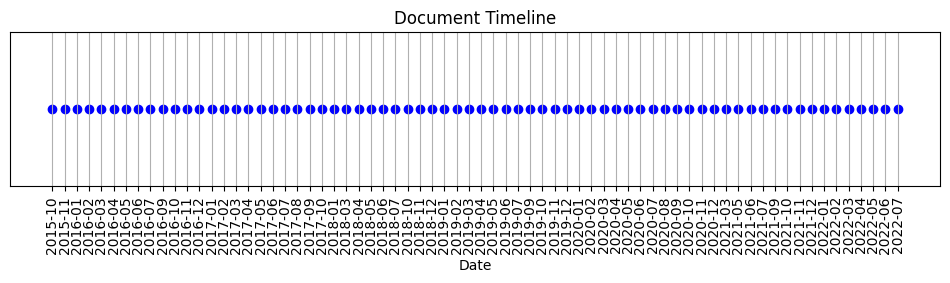

In [22]:
generalEDA(parlaMint_df, "ParlaMint")

In [23]:
# dataframe-specific EDA
print()
print(parlaMint_df["Speaker_gender"].value_counts())
print()
print("The total of speakers is:", len(set(parlaMint_df["Speaker_name"].values)))
print()
print("The transcription count by speaker is:", "\n", parlaMint_df["Speaker_name"].value_counts()[:10])
print()
percentage = (100 * parlaMint_df["Speaker_name"].value_counts().iloc[0]) / parlaMint_df.shape[0]
print("Percentage of the data spoken/recorded from the most frequent speaker on the corpora:", f"{percentage:.2f}%")
print()

# dictionary to store count per year, with year as key
year_count = {}

# setting date as the index of the dataframe
parlaMint_df = parlaMint_df.set_index("Date")

# iterating over the rows 
for date, row in parlaMint_df.iterrows():
    date = date[0:4]
    if date not in year_count:
        year_count[date] = 1  # adding year key to year_count
    else:
        year_count[date] += 1 # adding count to the year_count year

print("Year count sorted by year:", "\n", year_count, "\n")
year_count = sorted(year_count.items(), key=lambda x: x[1], reverse = True)
print("Year count sorted by transcriptions count:", "\n", year_count)
print()

parlaMint_df = parlaMint_df.reset_index() # reseting parlaMint index, so Date is not index anymore

#-----------------------------------------------------------------------------
speaker_toks = {}

# setting speaker as the index of the dataframe
parlaMint_df = parlaMint_df.set_index("Speaker_name")

# iterating over the rows 
for speaker, row in parlaMint_df.iterrows():
    if speaker not in speaker_toks:
        speaker_toks[speaker] = row["Text_len"]  # initializing author's length total
    else:
        speaker_toks[speaker] += row["Text_len"] # accumulating length to already present author

parlaMint_df = parlaMint_df.reset_index() # reseting parlaMint index, so Speaker_name is not index anymore

sorted_speaker_toks = sorted(speaker_toks.items(), key=lambda x: x[1], reverse = True)
top5_speaker_toks = sorted_speaker_toks[:5]
for item in top5_speaker_toks:
    speaker = item[0]
    print(speaker, "-", speaker_toks[speaker])

print()
percentage = (100 * speaker_toks[top5_speaker_toks[0][0]]) / parlaMint_df["Text_len"].sum()

print()
print("Percentage of the data spoken/recorded from the most frequent speaker on the corpora in characters:", f"{percentage:.2f}%")


Speaker_gender
M    27950
F    22874
Name: count, dtype: int64

The total of speakers is: 348

The transcription count by speaker is: 
 Speaker_name
Torrent i Ramió, Roger            10173
Forcadell i Lluís, Carme           8109
Borràs i Castanyer, Laura          4926
Costa i Rosselló, Josep            1390
Gallego i Herrera, Joan Carles     1079
Carrizosa Torres, Carlos            977
Rodríguez i Serra, Santi            626
Aragonès i Garcia, Pere             616
Fernández Álvarez, Alejandro        547
Torra i Pla, Joaquim                531
Name: count, dtype: int64

Percentage of the data spoken/recorded from the most frequent speaker on the corpora: 20.02%

Year count sorted by year: 
 {'2015': 194, '2016': 7955, '2017': 8055, '2018': 5659, '2019': 10059, '2020': 7304, '2021': 5726, '2022': 5872} 

Year count sorted by transcriptions count: 
 [('2019', 10059), ('2017', 8055), ('2016', 7955), ('2020', 7304), ('2022', 5872), ('2021', 5726), ('2018', 5659), ('2015', 194)]

Torrent i 

In [24]:
# storing ParlaMint dataframe as pickle
parlaMint_df.to_pickle("parlaMint.pkl")

**Exploratory Analysis Summary:**\
After parsing the data and turining it into a pandas data frame, the ParlaMint data frame has 24 columns.\
Out of the 24, twenty-three of the columns correspond to the metadata, all extracted from the tsv files. Some examples are the text ID, the role of the speaker, their gender, their year of birth and Language they speak in (relevant when comparing the different languages in the ParlaMint corpora).\
The last column, the 25th is the content/text, the transcription of the plenary session which as been extracted from the txt files and included in the dataframe previously.\
The oldest work from the ParlaMint copora is from October 2015, and the most recent from September 2022.\
The total length, and hence the amount of data we have in total from the ParlaMint corpora is about 90,000,000 characters.\
These come from different length texts, as we find that the shortest contributes to the total with 2 word characters, and the longest with about 100,000 characters.\
The average length of the 50824 transcriptions is about 1800 characters per text.\
The corpora give us information about Catalan through a span of 7 years. All of the seven years are represented in the corpora. However, while in 2019 over 10,000 transcriptions were recorded, in 2015 not even 200 were recorded. That is the exception, however, as the rest of the years, from 2016 to 2019, all are represented with over 5,000 transcriptions.\
Fortunately, the Parlament Parla corpora, previously loaded, contains data from 2007 to 2015 which will make up for this difference.\
The speaker's gender is evenly represented in the corpora, as we find around 2,500 transcriptons for both female and male speakers.\
There speech is from about 350 speakers which allows us to assume our data is not speaker-specific. However, we do note that the most frequent speaker in the corpora contributes to a 20% of the data. Looking at that percentage, it seemed like it could be a problem, as the specific speaker's speech style could be changing our analysis. To be certain about whether most of the data was on their speech or not the percentage was calculated off characters. As a result we found that only 3.36% of the data recorded was said by the most frequent speaker on the data set, which allows us to conclude it shouldn't be an issue when analyzing the data and drawing conclusions.

### 2.4 Radioteca.cat

Radioteca is a web-based library so will scrape the transcription of the broadcasts using beautiful soup.
The owner and creator of the library also provided a google sheets file containing the metadata, such as date aired, publisher, program name, title and URL. We will be using that data as well reading it in as a csv file. 

In [25]:
from bs4 import BeautifulSoup
import requests

In [26]:
# loading the csv file with the metadata and link to each of the transcriptions
radioteca_df = pd.read_csv("data/TranscripcionsRadioteca.csv", header = 0)

In [27]:
radioteca_df.head()

,Date Aired,Publisher,Program Name,Title,URL
0,2025-03-09,Cadena SER,Tot és Comèdia,ENTREVISTA. Àngel Duran,https://radioteca.cat/p/tot-es-comedia/2025/03...
1,2025-03-09,RAC1,Viatja Bé - Món natural,Fem una ruta fins al Santuari de Sant Llorenç ...,https://radioteca.cat/p/viatja-be_mon-natural/...
2,2025-03-09,RAC1,Viatja Bé - Descobrim,Sania Jelic viatja sola pel mon contra l'edadisme,https://radioteca.cat/p/viatja-be_descobrim/20...
3,2025-03-09,RAC1,Viatja Bé Hora a Hora,Diumenge 09/03/25 - 15 h,https://radioteca.cat/p/viatja-be_sencer/2025/...
4,2025-03-09,Catalunya Ràdio,En guàrdia!,"Matías Granja, del Pallars a Xile",https://radioteca.cat/p/en-guardia/2025/03/09/...


In [28]:
# changing the column names for our convenience
radioteca_df.columns = ["Date", "Publisher", "Program_name", "Title", "URL"]

In [29]:
radioteca_df.head()

,Date,Publisher,Program_name,Title,URL
0,2025-03-09,Cadena SER,Tot és Comèdia,ENTREVISTA. Àngel Duran,https://radioteca.cat/p/tot-es-comedia/2025/03...
1,2025-03-09,RAC1,Viatja Bé - Món natural,Fem una ruta fins al Santuari de Sant Llorenç ...,https://radioteca.cat/p/viatja-be_mon-natural/...
2,2025-03-09,RAC1,Viatja Bé - Descobrim,Sania Jelic viatja sola pel mon contra l'edadisme,https://radioteca.cat/p/viatja-be_descobrim/20...
3,2025-03-09,RAC1,Viatja Bé Hora a Hora,Diumenge 09/03/25 - 15 h,https://radioteca.cat/p/viatja-be_sencer/2025/...
4,2025-03-09,Catalunya Ràdio,En guàrdia!,"Matías Granja, del Pallars a Xile",https://radioteca.cat/p/en-guardia/2025/03/09/...


In [30]:
radioteca_df["Date"] = pd.to_datetime(radioteca_df["Date"])
radioteca_df["Year"] = radioteca_df["Date"].dt.year
item =(radioteca_df[pd.isnull(radioteca_df["Date"]) == True]).index
print(item)
radioteca_df = radioteca_df.drop(item)  # it's just one row NaN so we'll just drop that one

Index([363678], dtype='int64')


In [31]:
# setting the URL as index so we can scrape the pages more easly
radioteca_df = radioteca_df.set_index("URL")

In [32]:
# sample radioteca HTML content
sampleHTML = '''
<div class="transcript-segment">
    <div class="transcript-speaker">
        <span style="color:#aaffc3">Veu E</span>
        <span class="transcript-time">00:00:04</span>
    </div>
    <p class="transcript-text">Tot és comèdia. Màxim Castillo.</p>
</div>
'''

In [33]:
# global session object to be reused for much faster scraping
session = requests.Session()

def scrape_radiotecafile(file):
    '''
    Function to scrape Radioteca.cat
    makes a GET request to retrieve the webpage content 
    
    Scaping section: 
    "transcript-container" - contains transcript
    if container exists we iterate through "transcript-segment(s)" within
    and extract: 
    1- line id - as "transcript-speaker" (format: SpeakerTimestamp)
    2- speaker - the first 5 characters of the line-id
    3- time - "transcript-time"
    4- text/line - "transcript-text"

    to this data then we add:
    the date, the publisher, the program name, the title and the year
    all from the radioteca dataframe we created after the csv file previously

    all data is attached to the content dictionary as a list, where the key is the line_id
    the dictionary is returned
    '''

    # request
    response = session.get(url)  
    response.raise_for_status()

    # fetch
    soup = BeautifulSoup(response.text, "html.parser")
    transcript_section = soup.find("div", class_="transcript-container")
    content = {}


    if transcript_section:
        for segment in transcript_section.find_all("div", class_="transcript-segment"):
            # get the text of the transcipt
            segment_text = segment.get_text(strip=True)
            
            # extracting the line_id (speaker+time), speaker, time and the text
            if segment.find("p", class_="transcript-text"):
                line_id = segment.find("div", class_="transcript-speaker").get_text(strip=True)
                speaker = line_id[:5]
                time = segment.find("span", class_="transcript-time").get_text(strip=True)
                text = segment.find("p", class_="transcript-text").get_text(strip=True)

                # getting metadata from the dataframe resulting from the csv
                metadata = radioteca_df.loc[url]
                content[line_id] = [speaker, time, text, metadata["Date"], metadata["Publisher"], 
                                    metadata["Program_name"], metadata["Title"], url, metadata["Year"]]
                
    return content

In [34]:
radioteca_df.shape

(364417, 5)

**Comment:**\
36,4417 pages is a lot of pages and many transcriptions.\
I started by aiming to scrape all of them, however, the process was too long.\
Moreover, managing and going through the amount of data including radioteca with the other dataframes would have been quite unproductive.\
That is, every step of the process would take a lot longer.\
My second thought was getting data from 2010 and earlier, which is where we have the least amount of data with the previous data sets, specifically creating a gap around the 2000. And also a "second scrape" of data after 2022 which is more recent than any data we have in the previous resources.\
However, after 2022 the amount of data included in radioteca boosts by a lot, which made the process of analyzing it through the Exploratory Data Analysis, already remarkably slower. Therefore, for effectivity purposes, the final decision was to attempt to bridge the "century change" gap created by the other corpora, but sticking to 2022 as the last year included in the corpora.

In [35]:
# reducing the metadata dataframe to keep only the broadcasts up to 2010
radioteca_df_bef2010 = radioteca_df[radioteca_df["Year"] <= 2010]

In [36]:
radioteca_df_bef2010.shape

(16086, 5)

**Comment:**\
Keeping only the pages of broadcasts up to 2010 leaves us with 16,086 pages.\
It is still a great amount of data in a more manageable size.

**In the following lines of code:**\
The process of web-scraping is implemented through the function we previously defined.
It is surounded by "tqdm" to see the progress.\
It is also surrounded by various try and exception catches, all included through trial and error because this is a risky and long operation, and a single error would stop our progress and result in no data being saved from the scraping process. 

In [ ]:
# creating the list were every line of the transcriptions will be included with its respective metadata
# radioteca_lines_list = ["Line_id", "Speaker", "Text", "Date", "Publisher", "Program_name", "Title", "Year"]
radioteca_lines_list = []

from tqdm import tqdm
from requests.exceptions import RequestException

'''
we run every URL-looking URL in radioteca broadcasted before 2010 (as the index of radioteca_df_bef2010) 
through the scrape_radiotecafile

this will return the scraped data dictionary
that will be taken in, if it is not None (if its none we will just continue to the next URL)

Then for every key (every line_id) and its value (scraped data in list)
we will create a row dictionary containing:
    - the key
    - every element of the list accessed through its index as the value[index]

if the index of the value list is not found an exception will be printed
the scraping and dataframe creation process will continue

the resulting dictionary will be appended to the empty list radioteca_lines_list initialized above
the list will be turned into a pandas dataframe
and then pickled so we don't have to re-do the process again and the dataframe is correctly stored
'''
for url in tqdm(radioteca_df_bef2010.index):
    if pd.isna(url) or not (url.startswith("http://") or url.startswith("https://")):
        continue
    
    try:
        dictionary = scrape_radiotecafile(url)
    except RequestException as e:
        continue

    if dictionary is None:
        continue
        
    try:
       for key, value in dictionary.items():
           row = {"Line_id": key,
                "Speaker": value[0],
                "Time": value[1],
                "Text": value[2],
                "Date": value[3],
                "Station": value[4],
                "Show": value[5],
                "Episode": value[6],
                "URL": value[7],
                "Year": value[8]
                }
           radioteca_lines_list.append(row)
        
    except IndexError as e:
        print(f"Skipping {key}")
    except Exception as e:
        print(f"Skipping {key}")

radioteca_lines_df = pd.DataFrame(radioteca_lines_list)
radioteca_lines_after2020_df.to_pickle("radioteca2010.pkl")

In [34]:
# the previous cell output is not present as it hasn't been re-run after the scraping and pickling
# the whole process took around 30 to 50 minutes, therefore I will run it before final submission again
# at the moment we will unpickle the dataframe and work from there

In [37]:
# loading the pickled dataframe
radioteca_df = pd.read_pickle("radioteca2010.pkl")

In [38]:
print(radioteca_df.shape)

(966367, 10)


**Comment:**
The radioteca dataframe now contains over 900 thousand radio broadcast contributions.  

In [39]:
radioteca_df.head()

,Line_id,Speaker,Time,Text,Date,Station,Show,Episode,URL,Year
0,Veu B00:00:00,Veu B,00:00:00,"Guillem Sanz, l'home més a televisió de l'equi...",2010-12-31,Catalunya Ràdio,Pantalla plana,Pantalla plana - 31/12/10,https://radioteca.cat/p/el-secret_pantalla-pla...,2010.0
1,Veu A00:00:13,Veu A,00:00:13,"Molt bé, molt bé.\nEstaran i acabaran.",2010-12-31,Catalunya Ràdio,Pantalla plana,Pantalla plana - 31/12/10,https://radioteca.cat/p/el-secret_pantalla-pla...,2010.0
2,Veu B00:00:15,Veu B,00:00:15,"Això te n'anava a dir.\nI últim dia de l'any, ...",2010-12-31,Catalunya Ràdio,Pantalla plana,Pantalla plana - 31/12/10,https://radioteca.cat/p/el-secret_pantalla-pla...,2010.0
3,Veu A00:00:18,Veu A,00:00:18,"Repassar... Sí, una mica de resum.\nQuè et sem...",2010-12-31,Catalunya Ràdio,Pantalla plana,Pantalla plana - 31/12/10,https://radioteca.cat/p/el-secret_pantalla-pla...,2010.0
4,Veu B00:00:20,Veu B,00:00:20,"És original, això.\nM'agrada.",2010-12-31,Catalunya Ràdio,Pantalla plana,Pantalla plana - 31/12/10,https://radioteca.cat/p/el-secret_pantalla-pla...,2010.0


--- EDA Radioteca.cat ---
The dataframe has: 966367 rows 10 columns 

Dataframe's info is:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966367 entries, 0 to 966366
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   Line_id  966367 non-null  object        
 1   Speaker  966367 non-null  object        
 2   Time     966367 non-null  object        
 3   Text     966367 non-null  object        
 4   Date     966367 non-null  datetime64[ns]
 5   Station  965756 non-null  object        
 6   Show     966367 non-null  object        
 7   Episode  966367 non-null  object        
 8   URL      966367 non-null  object        
 9   Year     966367 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 73.7+ MB
None 

The Dataframe's 10 columns are: 
 Index(['Line_id', 'Speaker', 'Time', 'Text', 'Date', 'Station', 'Show',
       'Episode', 'URL', 'Year'],
      dtype='object') 

The

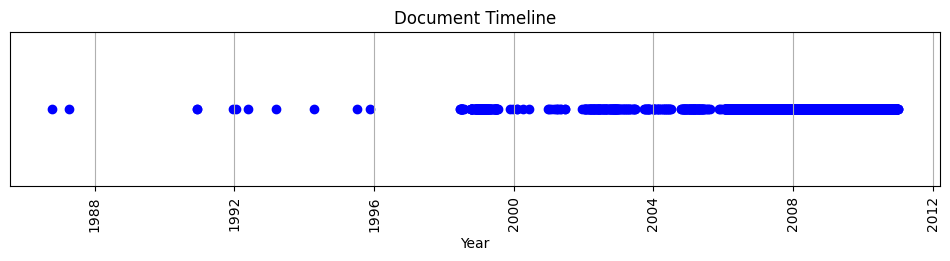

In [40]:
# generalEDA
generalEDA(radioteca_df, "Radioteca.cat")

In [41]:
# dataframe-specific EDA
print()
print("The total of different stations are:", len(set(radioteca_df["Station"].values)))
print()
print("The total of lines per station are:", "\n", "\n", radioteca_df["Station"].value_counts())
print()
radioteca_df_linesSpeaker = radioteca_df.groupby("Episode")["Speaker"].value_counts()
#print(radioteca_df_linesSpeaker.head())
print()
print("The maximum number of lines per speaker are:", radioteca_df.groupby("Episode")["Speaker"].value_counts().max())
print("The minimum number of lines per speaker are:", radioteca_df.groupby("Episode")["Speaker"].value_counts().min())
print()
show_grouped = radioteca_df.groupby(["Episode", "Speaker"])["Text_len"].sum()
#print(show_grouped.head())
print()
print("The character count for the speaker contrbuting with the most amount of data is", show_grouped.max())
print("The character count for the speaker contrbuting with the least amount of data is", show_grouped.min())
print()
year_tokscount = radioteca_df.groupby("Year")["Text_len"].sum().sort_values(ascending=False)
print("Characters count per year sorted from most to least characters:")
year_tokscount


The total of different stations are: 617

The total of lines per station are: 
 
 Station
Catalunya Ràdio         750218
Catalunya Música        127150
RAC1                     40416
iCat                     18956
RTVE                     18234
Catalunya Informació     10782
Name: count, dtype: int64


The maximum number of lines per speaker are: 15664
The minimum number of lines per speaker are: 1


The character count for the speaker contrbuting with the most amount of data is 6176008
The character count for the speaker contrbuting with the least amount of data is 0

Characters count per year sorted from most to least characters:


Year
2010.0    84233024
2009.0    71170016
2008.0    54696857
2007.0    28760482
2006.0    25492818
2005.0      985438
2002.0      434487
2004.0      422663
2001.0      236642
2003.0      145238
1999.0      115069
1998.0       71712
1995.0       67709
1993.0       34391
2000.0       10417
1986.0        9812
1987.0        4657
1992.0        4089
1990.0        3516
1991.0        1155
1994.0         602
Name: Text_len, dtype: int64

**Exploratory Analysis Summary:**\
The Radioteca library has been scraped and turned into a 10-column data frame along with the metadata from the CSV file. It is now all in a single data frame containing the Line_id, Speaker, Time, Text, Date, Station, Show, Episode, URL, and Year (extracted from the date for easier comparison and merging with other data frames).\
The oldest work from Radioteca is from 1986; the latest work we scraped from the web library is from 2010.\
The total length, and hence the amount of data we have in total from the Radioteca corpora, is well over 2 billion characters long.\
These come from different-lengthed texts, as the shortest has zero characters, and the longest contributes about 23,000 characters.\
The average length of the almost 267 million contribution transcriptions is about 276 characters per text.\
The transcriptions give us information about Catalan through almost 25 years. However, not all years are represented, nor is their representation in the data amount the same. While the broadcasts for 2010 add up to over 84,000,000 characters, we only have barely over 600 characters for 1994. It seems like, overall, we have a lot more recent transcriptions, as we see the character amount increase remarkably from 2005 until 2010. \
The transcribed broadcasts are from shows from over 600 different stations, allowing for a less show-specific data frame. However, they don't all provide the same amount of data. Catalunya Ràdio is clearly the most transcribed in the Radioteca library. However, it is the regional chain, so it shouldn't be genre or topic-specific. Nevertheless, it could affect our analysis due to social factors, such as the type of audience of this program. Still, I believe that is part of the nature of this project, as well as using real language data.\
As radio broadcasts can be from conversation-like to even monologues, not all speakers contribute equally. The minimum number of lines per speaker is 1. Still, a single speaker that accounts for the most lines contributes to over 15,000 lines. In terms of characters, that is zero characters for the minimum and over 6,000,000 for the maximum.

### 2.5 Complete dataframe

Some of the data frames come with a great amount of metadata that won't be necessary for our research purposes. To keep it we will maintain the separate dataframes and create a merged one extracting only the columns necessary for our research question. That will be the title, date and text/content. We will also create other columns that will be useful for our Exploratory Data Analysis. 

In [42]:
# creating a reduced dataframe with only the date info, title of the file, content/text columns and its length
reduced_CTILC = CTILC_df.filter(["Year", "Title", "Text", "Text_len"])
reduced_parlament_parla = parlament_parla_df.filter(["Path", "Sentence", "Text", "Text_len"])
reduced_parlamint = parlaMint_df.filter(["Date", "Title", "Text", "Text_len"])
reduced_radioteca = radioteca_df.filter(["Year", "Line_id", "Text", "Text_len"])

# adding a Source Corpora column to keep the data
reduced_CTILC["Source_corpora"] = "CTILC"
reduced_parlament_parla["Source_corpora"] = "Parlament Parla"
reduced_parlamint["Source_corpora"] = "ParlaMint"
reduced_radioteca["Source_corpora"] = "Radioteca.cat"

In [43]:
reduced_radioteca.head()

,Year,Line_id,Text,Text_len,Source_corpora
0,2010.0,Veu B00:00:00,"Guillem Sanz, l'home més a televisió de l'equi...",68,Radioteca.cat
1,2010.0,Veu A00:00:13,"Molt bé, molt bé.\nEstaran i acabaran.",37,Radioteca.cat
2,2010.0,Veu B00:00:15,"Això te n'anava a dir.\nI últim dia de l'any, ...",79,Radioteca.cat
3,2010.0,Veu A00:00:18,"Repassar... Sí, una mica de resum.\nQuè et sem...",49,Radioteca.cat
4,2010.0,Veu B00:00:20,"És original, això.\nM'agrada.",28,Radioteca.cat


In [44]:
reduced_parlament_parla.head()

,Path,Text,Text_len,Source_corpora
0,clean_train/3/1/31ca4d158eaef166c37a_18.87_23....,perquè que el president de catalunya sigui reb...,85,Parlament Parla
1,clean_train/3/1/31ca4d158eaef166c37a_60.13_65....,que lliga absolutament amb allò que vostè diu ...,115,Parlament Parla
2,clean_train/2/8/2803008bb00cb0c86de6_17.0_30.1...,gràcies presidenta consellera atès l'inici del...,176,Parlament Parla
3,clean_train/2/8/2803008bb00cb0c86de6_31.03_44....,li volem preguntar si el seu departament té pr...,209,Parlament Parla
4,clean_train/2/8/2803008bb00cb0c86de6_44.74_53....,per tal d'iniciar la recuperació de l'ensenyam...,160,Parlament Parla


There is no date metadata provided for the parlament parla dataframe.\
For our purposes, as we need a date we will make an aproximation based off the data given by the owners.\
As Parlament Parla is presented as a corpora containing data from 2007 to 2015 we will assign the date aproximation 2010 to all the data in the Parlament Parla dataframe.\
We will also only keep the year infomation as the date in the corpora parlamint and the radioteca data frame where the full (month, day, year) information was provided.

In [45]:
# adding 2010 date to parlament parla rows
reduced_parlament_parla["Year"] = 2010

# keeping only the year on parlaMint
reduced_parlamint["Date"] = reduced_parlamint["Date"].apply(lambda x :x[0:4])

In [46]:
reduced_parlament_parla.head() # checking if we successfully created the Year column

,Path,Text,Text_len,Source_corpora,Year
0,clean_train/3/1/31ca4d158eaef166c37a_18.87_23....,perquè que el president de catalunya sigui reb...,85,Parlament Parla,2010
1,clean_train/3/1/31ca4d158eaef166c37a_60.13_65....,que lliga absolutament amb allò que vostè diu ...,115,Parlament Parla,2010
2,clean_train/2/8/2803008bb00cb0c86de6_17.0_30.1...,gràcies presidenta consellera atès l'inici del...,176,Parlament Parla,2010
3,clean_train/2/8/2803008bb00cb0c86de6_31.03_44....,li volem preguntar si el seu departament té pr...,209,Parlament Parla,2010
4,clean_train/2/8/2803008bb00cb0c86de6_44.74_53....,per tal d'iniciar la recuperació de l'ensenyam...,160,Parlament Parla,2010


In [47]:
# casting year as integer
print(type(reduced_radioteca["Year"][0])) # it is currently a float that we extracted from the complete date
reduced_radioteca["Year"] = reduced_radioteca["Year"].apply(int)
print(type(reduced_radioteca["Year"][0])) # checking if data type is now what we need

<class 'numpy.float64'>
<class 'numpy.int64'>


In [48]:
# adjusting column names to match before concatenating
reduced_CTILC = reduced_CTILC.rename(columns ={"Year":"Year", "Title":"Line_id", "Text":"Text", 
                                                                   "Source_corpora":"Source_corpora", "Text_len":"Text_len"})
reduced_parlament_parla = reduced_parlament_parla.rename(columns ={"Year":"Year", "Path":"Line_id", "Text":"Text", 
                                                                   "Source_corpora":"Source_corpora", "Text_len":"Text_len"})
reduced_parlamint = reduced_parlamint.rename(columns ={"Date":"Year", "Title":"Line_id", "Text":"Text", 
                                                       "Source_corpora":"Source_corpora", "Text_len":"Text_len"})
reduced_radioteca = reduced_radioteca.rename(columns ={"Year":"Year", "Line_id":"Line_id", "Text":"Text", 
                                                       "Source_corpora":"Source_corpora", "Text_len":"Text_len"})

In [49]:
# concatenating all datasets' relevant columns in a single data frame
complete_data = pd.concat([reduced_CTILC, reduced_parlament_parla, reduced_parlamint, reduced_radioteca]) 

In [50]:
complete_data.head()

,Year,Line_id,Text,Text_len,Source_corpora
0,1926,Discurs llegit per... donar a conèxer la perso...,"L'home que per amor al estudi, impulsat per un...",37497,CTILC
1,1920,Parlament llegit en la festa inaugural de l'Or...,"Cantaires de la Garriga, Senyores i senyors:\n...",9253,CTILC
2,1900,Discurs-pròlec,Discurs-prolec Llegit en la societat mèdic-far...,73881,CTILC
3,1894,Discurs,"Senyors excelentissims, senyors:\n\nQuan rebí ...",29393,CTILC
4,1903,Discurs,"Senyors:\n\nSembla que era air, y fa ja uns qu...",26577,CTILC


In [51]:
# checking nan
print(complete_data.isna().sum())

Year              0
Line_id           0
Text              0
Text_len          0
Source_corpora    0
dtype: int64


In [52]:
# sorting joined data by year, from oldest to most recent
complete_data["Year"] = complete_data["Year"].apply(lambda x : int(x)) # casting all Years as integers, as we have some strings mixed up
complete_data.sort_values(["Year"])

,Year,Line_id,Text,Text_len,Source_corpora
27,1860,Discurs,"Breu seré, cuant ja se han complagut vostres o...",9551,CTILC
23,1868,Discurs,Excel·lentissim senyor:\n\nA últims del segle ...,18618,CTILC
26,1873,Discurs pronunciat en la sessió inaugural que ...,Senyors:\n\nDever meu es avuy 'l dirigirvos la...,36899,CTILC
25,1876,Teatre catalá,Sempre es estada tal la seua manera de reprodu...,62307,CTILC
21,1878,Discurs inaugural,Discurs inaugural.\n\nExcel·lentísim senyor; S...,21840,CTILC
...,...,...,...,...,...
46905,2022,"Corpus Parlamentari en català ParlaMint-ES-CT,...","Per repreguntar, té la paraula el senyor Carri...",51,ParlaMint
46904,2022,"Corpus Parlamentari en català ParlaMint-ES-CT,...","Moltes gràcies, presidenta. Senyor diputat, co...",531,ParlaMint
46903,2022,"Corpus Parlamentari en català ParlaMint-ES-CT,...","Per respondre, té la paraula el president de l...",60,ParlaMint
46901,2022,"Corpus Parlamentari en català ParlaMint-ES-CT,...",Pregunta al president de la Generalitat a resp...,434,ParlaMint


In [53]:
# resetting index after sorting
complete_data = complete_data.reset_index()

In [54]:
complete_data.head()

,index,Year,Line_id,Text,Text_len,Source_corpora
0,0,1926,Discurs llegit per... donar a conèxer la perso...,"L'home que per amor al estudi, impulsat per un...",37497,CTILC
1,1,1920,Parlament llegit en la festa inaugural de l'Or...,"Cantaires de la Garriga, Senyores i senyors:\n...",9253,CTILC
2,2,1900,Discurs-pròlec,Discurs-prolec Llegit en la societat mèdic-far...,73881,CTILC
3,3,1894,Discurs,"Senyors excelentissims, senyors:\n\nQuan rebí ...",29393,CTILC
4,4,1903,Discurs,"Senyors:\n\nSembla que era air, y fa ja uns qu...",26577,CTILC


In [55]:
# pickling the complete joined data frame
complete_data.to_pickle("mydata.pkl")

In [56]:
# reading in the pickle
# complete_data = pd.read_pickle("mydata.pkl")

#### Exploratory Data Analysis 

In [57]:
# checking the amount of data per year
years = complete_data.groupby("Year")["Text_len"].sum()
print(list(zip(years.index, years)))

[(1860, 9551), (1868, 18618), (1873, 36899), (1876, 62307), (1878, 39900), (1879, 15853), (1881, 20069), (1883, 36217), (1884, 21728), (1885, 13543), (1886, 9178), (1887, 15147), (1889, 38448), (1890, 26544), (1891, 33265), (1894, 29393), (1899, 61063), (1900, 73881), (1903, 26577), (1905, 19662), (1906, 14899), (1907, 31790), (1909, 20656), (1920, 9253), (1926, 37497), (1986, 9812), (1987, 4657), (1990, 3516), (1991, 1155), (1992, 4089), (1993, 34391), (1994, 602), (1995, 67709), (1998, 71712), (1999, 115069), (2000, 10417), (2001, 236642), (2002, 434487), (2003, 145238), (2004, 422663), (2005, 985438), (2006, 25492818), (2007, 28760482), (2008, 54696857), (2009, 71170016), (2010, 97407781), (2015, 887974), (2016, 14155198), (2017, 12397205), (2018, 9695828), (2019, 15727277), (2020, 17029343), (2021, 12069524), (2022, 11690609)]


**Note:**\
The following code is a less efective way to do what we just did previously using pandas effectively.\
However it is the first approach and what works with the plot until I makes some changes ASAP.\

In [58]:
#creating a dictionary of the cumulative amount of characters per year
year_length = {}

# setting year as the index of the dataframe
complete_data = complete_data.set_index("Year")

# iterating over the rows 
for year, row in complete_data.iterrows():
    if year not in year_length:
        year_length[year] = row["Text_len"]  # initializing year's length total
    else:
        year_length[year] += row["Text_len"]  # accumulating length to already present year

year_length = dict(sorted(year_length.items(), key=lambda item: item[1]))
for key in year_length.keys():
    value = year_length[key]
    #print(key, "-", value)

**Comment:**\
We can see that the data is not evenly spread, and there is a considerable imbalance in the amount of data for every year. While for 1994, we only have about 602 characters, we have over 97 billion characters for 2010. In general, after 2005, we have a vast amount of data, contrasting with earlier years. This list, however, is tough to parse due to its extension and the numbers being up to the billions. For a more comprehensive analysis, let’s create some plots.

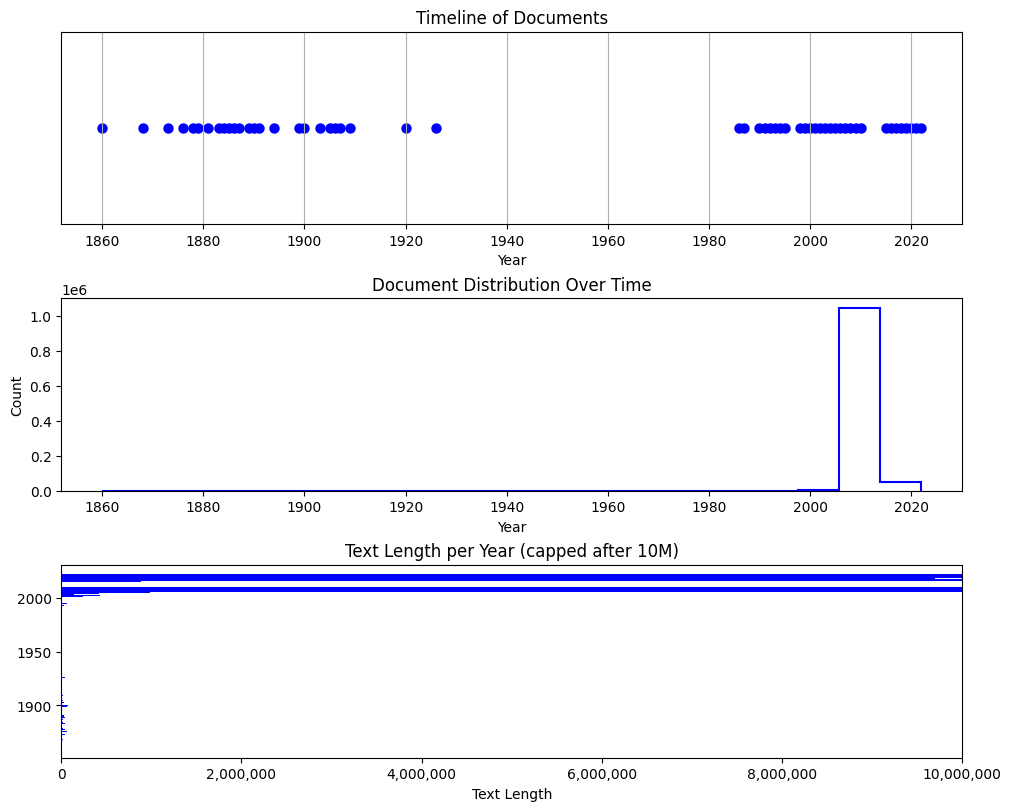

In [59]:
import matplotlib.ticker as ticker  

# placeholder y-values for timeline
years = list(year_length.keys())  
y_values = np.ones(len(years)) 

# creating mosaic layout for our multiple plots
fig, ax = plt.subplot_mosaic([["B", "B"],  # Timeline
                              ["A", "A"],  # Histogram
                              ["D", "D"]],  # Text count & corpus length
                             figsize=(10, 8),
                             constrained_layout=True)

# (A) Histogram of Document Distribution Over Time
ax["A"].hist(complete_data.index, bins=min(20, len(years)), histtype="step", color="blue", lw=1.5)
ax["A"].set_title("Document Distribution Over Time")
ax["A"].set_xlabel("Year")
ax["A"].set_ylabel("Count")

# (B) Timeline (Scatter Plot)
ax["B"].scatter(years, y_values, color="blue", marker="o", lw=1.5)
ax["B"].set_title("Timeline of Documents")
ax["B"].set_xlabel("Year")
ax["B"].set_yticks([])  # Remove y-axis labels since they are not meaningful
ax["B"].grid(axis="x")

# (D) Text length per year in character counts
capped_values = [min(val, 10_000_000) for val in year_length.values()]  # limit to 10M

ax["D"].barh(list(year_length.keys()), capped_values, color="blue")
ax["D"].set_title("Text Length per Year (capped after 10M)")  
ax["D"].set_xlabel("Text Length")  

# Fix Tick Labels (Without `ticker`)
x_ticks = ax["D"].get_xticks()  
ax["D"].set_xticks(x_ticks)  
ax["D"].set_xticklabels([f"{int(x):,}" for x in x_ticks])  
ax["D"].set_xlim(0, 10_000_000)

# displaying the plots' mosaic
plt.show()

## Conclusions on the resulting data:
Currently, there are some issues that we can see on the plots and through the exploratory data analysis of all individual data frames, including the complete one. We will need to find a solution to these or work around them by considering the caveats it might extend to and being aware of the following points when drawing conclusions.

In the first two plots we can now clearly see the data distribution. There is a massive spike in the number of documents. However, we need to note that these are “contributions” and are not equal in size as we count single lines of speech in a conversation-like radio broadcast and a whole monologue or speech as the same in this measurement.

An even more descriptive plot of this data distribution issue is the text length per year plot, the second one, where we can barely see the data amount for the early years we cover. Instead, the most recent data is vast. After the 10 million characters, the data was even required to be capped.

The two previous issues are partly due to another problem. The Palament Parla data does not have a specific date, which spikes the amount of data in 2015 after the approximation, which we will need to be mindful of in the following steps.

The plot also highlights another imbalance. Even after bringing in the Radioteca data, there is a gap in the data from the 1930s until the 1970s. We do not have any data. However, that is not surprising and showcases Catalan’s situation perfectly. These dates match Franco’s dictatorship from the late 1930s until the 1970s, during which Catalan’s use was forbidden. Therefore, this gap is natural. We shouldn't try to bridge it, and even if we wanted to, it would be hardly avoidable.

## Changes on the Data Frame posterior to the analysis

To even out the data. We are going to drop and reorganize some of it.

**Strategy 1:Limiting Individual Contribution**\
Aiming for the most unbiased and representative data, we will first drop individual Speaker's contributions if they are over 1500 characters (about 200 words) long for the ParlaMint, Parlament Parla, and Radioteca data. This will allow for a less speaker-specific analysis.\
**Strategy 2: Balancing Program  Contribution**\
Since Radioteca has a lot of metadata, we will also use another piece of data ensure a more representative distribution while reducing the data size by limiting a show's episode contribution to 1500 characters as well. That way, we are also ensuring a more diverse corpora topic-wise and less show-specific data.\
**Strategy 3: Adjusting Temporal Distribution**\
The approach of rounding all data to the average year for Parlament Parla because it has no specific date information was probably not the right approach as it doesn't allow us for a more even distribution of the data. Since we are working with data over time, and it doesn't need to be year-specific, as language change is a process and not a one-day-to-the-next change, we'll attempt to distribute the parlament-parla files evenly throughout the years it covers, which is from 2007 to 2018. We must be mindful of this when we break down the time periods to analyze the data later.

**Note:**\
This strategies will only be applied to Parlament Parla, ParlaMint and Radioteca as applying them to CTILC would leave us with very little data.

### Strategy 1:Limiting Individual Contribution

Limiting the contribution of a single speaker/contributor to 1500 characters in the ParlaMint, Parlament Parla and Radioteca data frames.

In [60]:
def under1500(dataframe, contrivutorColName):
    '''
    takes in a dataframe
    after the cumulative text length of one speaker goes over 1500 characters
    the following contributions are no longer added to the dataframe
    ensuring a max of 1500 characters per speaker/contributor
    prints out the maximum and minimum length per contributor before and after the change
    '''
    if contrivutorColName == "Speaker":
        dataframe["CUMSUM_len"] = dataframe.groupby(["Episode", contrivutorColName])["Text_len"].cumsum()
    else:
        dataframe["CUMSUM_len"] = dataframe.groupby(contrivutorColName)["Text_len"].cumsum()
    max1500_df = dataframe[dataframe["CUMSUM_len"] <= 1500]
    if contrivutorColName == "Speaker":
        before_spkcount = dataframe.groupby(["Episode", contrivutorColName])["Text_len"].sum()
        after_spkcount = max1500_df.groupby(["Episode", contrivutorColName])["Text_len"].sum()
    else:
        before_spkcount = dataframe.groupby(contrivutorColName)["Text_len"].sum()
        after_spkcount = max1500_df.groupby(contrivutorColName)["Text_len"].sum()

    #printing contribution max and min to ensure the process worked out well
    print()
    print("Before speaker contribution limit:")
    print("The character count for the speaker contrbuting with the most amount of data is", before_spkcount.max())
    print("The character count for the speaker contrbuting with the least amount of data is", before_spkcount.min())
    print("After speaker contribution limit:")
    print("The character count for the speaker contrbuting with the most amount of data is", after_spkcount.max())
    print("The character count for the speaker contrbuting with the least amount of data is", after_spkcount.min())

    return max1500_df

In [61]:
print()
print("\nParlament Parla:")
under1500_parlparl_df = under1500(parlament_parla_df, "Speaker_id")
print()
print("\nParlaMint:")
under1500_parlaMint_df = under1500(parlaMint_df, "Speaker_name")
print()
print("\nRadioteca.cat:")
under1500_radioteca_df = under1500(radioteca_df, "Speaker")



Parlament Parla:

Before speaker contribution limit:
The character count for the speaker contrbuting with the most amount of data is 580705
The character count for the speaker contrbuting with the least amount of data is 97
After speaker contribution limit:
The character count for the speaker contrbuting with the most amount of data is 1500
The character count for the speaker contrbuting with the least amount of data is 97


ParlaMint:

Before speaker contribution limit:
The character count for the speaker contrbuting with the most amount of data is 3145229
The character count for the speaker contrbuting with the least amount of data is 102
After speaker contribution limit:
The character count for the speaker contrbuting with the most amount of data is 1498
The character count for the speaker contrbuting with the least amount of data is 3


Radioteca.cat:

Before speaker contribution limit:
The character count for the speaker contrbuting with the most amount of data is 6176008
The ch

### Strategy 2: Balancing Content 

Limiting the contribution of a single episode of a radio show to 1500 characters in the Radioteca data frame.

In [62]:
# creating a column containing the cummulative sum of characters (length) in a show's episode
under1500_radioteca_df = under1500_radioteca_df.copy()
under1500_radioteca_df["CUMSUM_ep"] = under1500_radioteca_df.groupby("Episode")["Text_len"].cumsum()

In [63]:
under1500_radioteca_df.head()

,Line_id,Speaker,Time,Text,Date,Station,Show,Episode,URL,Year,Text_len,CUMSUM_len,CUMSUM_ep
0,Veu B00:00:00,Veu B,00:00:00,"Guillem Sanz, l'home més a televisió de l'equi...",2010-12-31,Catalunya Ràdio,Pantalla plana,Pantalla plana - 31/12/10,https://radioteca.cat/p/el-secret_pantalla-pla...,2010.0,68,68,68
1,Veu A00:00:13,Veu A,00:00:13,"Molt bé, molt bé.\nEstaran i acabaran.",2010-12-31,Catalunya Ràdio,Pantalla plana,Pantalla plana - 31/12/10,https://radioteca.cat/p/el-secret_pantalla-pla...,2010.0,37,37,105
2,Veu B00:00:15,Veu B,00:00:15,"Això te n'anava a dir.\nI últim dia de l'any, ...",2010-12-31,Catalunya Ràdio,Pantalla plana,Pantalla plana - 31/12/10,https://radioteca.cat/p/el-secret_pantalla-pla...,2010.0,79,147,184
3,Veu A00:00:18,Veu A,00:00:18,"Repassar... Sí, una mica de resum.\nQuè et sem...",2010-12-31,Catalunya Ràdio,Pantalla plana,Pantalla plana - 31/12/10,https://radioteca.cat/p/el-secret_pantalla-pla...,2010.0,49,86,233
4,Veu B00:00:20,Veu B,00:00:20,"És original, això.\nM'agrada.",2010-12-31,Catalunya Ràdio,Pantalla plana,Pantalla plana - 31/12/10,https://radioteca.cat/p/el-secret_pantalla-pla...,2010.0,28,175,261


In [64]:
# checking how many of the episodes are bellow or over the 1500 characters to see if this is an effective mesure
under1500_radioteca_df_counts = under1500_radioteca_df.groupby("Episode")["Text_len"].sum()>1500
under1500_radioteca_df_counts.value_counts()

Text_len
True     9192
False    1638
Name: count, dtype: int64

**Comment:**\
It seems like this might be an effective measure as there are over 9,000 episodes that contribute with over 1500 characters.

In [65]:
max1500_ep_df = under1500_radioteca_df[under1500_radioteca_df["CUMSUM_ep"] <= 1500]  # keeping only the 1500 characters of episodes

In [66]:
# grouping the reduced data to check if we achieved our goal
under1500_radioteca_df_counts = max1500_ep_df.groupby("Episode")["Text_len"].sum()>1500
under1500_radioteca_df_counts.value_counts()

Text_len
False    10830
Name: count, dtype: int64

**Comment:**\
Now we don't have more than 1500 characters from any of the episodes.

### Strategy 3: Adjusting Temporal Distribution

Distributing the parlament-parla files evenly throughout the years it covers (2007-2018) instead of approximating all of them as 2015.

In [67]:
# stablishing number of rows/documents/contributions that parlament parla contains 
size = under1500_parlparl_df.shape[0]
print(size)

3849


In [68]:
# creating a numpy array containing 3849 random years between 2007 to 2018, both included
import numpy as np
years = np.random.randint(2007, 2019, size) # 2019 will be excluded

In [69]:
# turning the numpy array into a list
under1500_parlparl_df["Year_rand"] = years.tolist()

/var/folders/w3/wyp2ndvd7tj4pp0f64jn72n40000gn/T/ipykernel_8716/363694456.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  under1500_parlparl_df["Year_rand"] = years.tolist()


In [70]:
# checking the documents per year distribution we ended up with after the random year assignantion 
print(under1500_parlparl_df["Year_rand"].value_counts())
print()
print("Total:")
print(under1500_parlparl_df["Year_rand"].value_counts().sum())
print()
print("Mean:")
print(under1500_parlparl_df["Year_rand"].value_counts().mean())
print()
print("Standard deviation:")
print(under1500_parlparl_df["Year_rand"].value_counts().std())
print()

Year_rand
2008    347
2011    343
2012    342
2016    334
2018    333
2015    331
2017    328
2010    314
2009    304
2007    297
2013    294
2014    282
Name: count, dtype: int64

Total:
3849

Mean:
320.75

Standard deviation:
21.797101558776948




**Comment:**\
We ended up with a decently even spread through the years. All the years are represented with around 320 pieces of data.\
A standard deviation of 15 contributions of data, considering that we are working with a total of 3849, seems to be a reasonably uniform distribution that we can use, being mindful that it is not the real date of the documents and just an approximation. We should keep the data from 2007 to 2018 as grouped as possible to avoid making misanalyses or drawing incorrect conclusions.

### Re-evaluating our data

In [71]:
under1500_parlparl_df = under1500_parlparl_df.filter(["Path", "Text", "Year_rand", "Text_len"])
under1500_parlaMint_df = under1500_parlaMint_df.filter(["Title", "Text", "Date", "Text_len"])
under1500_radioteca_df = max1500_ep_df.filter(["Line_id", "Text", "Year", "Text_len"])

In [72]:
# keeping only the year on parlaMint
under1500_parlaMint_df["Date"] = under1500_parlaMint_df["Date"].apply(lambda x :x[0:4])
# casting year as integer
print(type(under1500_radioteca_df["Year"][0])) # it is currently a float that we extracted from the complete date
under1500_radioteca_df["Year"] = under1500_radioteca_df["Year"].apply(int)
print(type(under1500_radioteca_df["Year"][0])) # checking if data type is now what we need

<class 'numpy.float64'>
<class 'numpy.int64'>


In [73]:
modif_parlparl_df = under1500_parlparl_df.rename(columns ={"Path":"Line_id", "Text":"Text", "Year_rand":"Year", "Text_len":"Text_len"})
modif_parlaMint_df = under1500_parlaMint_df.rename(columns ={"Title":"Line_id", "Text":"Text", "Date":"Year", "Text_len":"Text_len"})
modif_radioteca_df = under1500_radioteca_df.rename(columns ={"Line_id":"Line_id", "Text":"Text", "Year":"Year", "Text_len":"Text_len"})

In [74]:
modif_radioteca_df["Year"] = modif_radioteca_df["Year"].apply(int)
modif_parlaMint_df["Year"] = modif_parlaMint_df["Year"].apply(int)
modif_parlparl_df["Year"] = modif_parlparl_df["Year"].apply(int)
reduced_CTILC["Year"] = reduced_CTILC["Year"].apply(int)

In [75]:
# re-joining data after changes
modif_complete_data = pd.concat([reduced_CTILC, modif_parlparl_df, modif_parlaMint_df, modif_radioteca_df]) 

In [76]:
modif_complete_data.to_pickle("modified1_complete.pkl")

In [77]:
# creating a list of the years we are covering with the complete dataframe
years = modif_complete_data.groupby("Year")["Text_len"].sum()
year_count = years.tolist()
years = set([int(year) for year in years.index])

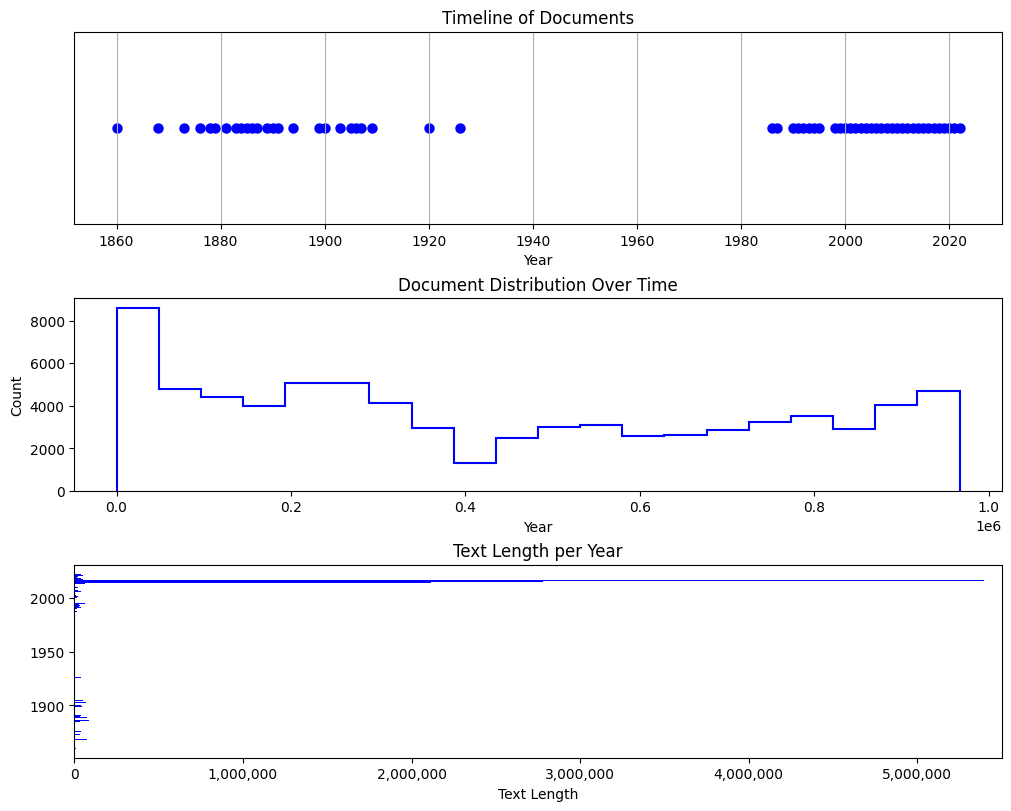

In [78]:
import matplotlib.ticker as ticker  

# placeholder y-values for timeline
y_values = np.ones(len(years)) 

# creating mosaic layout for our multiple plots
fig, ax = plt.subplot_mosaic([["B", "B"],  # Timeline
                              ["A", "A"],  # Histogram
                              ["D", "D"]],  # Text count & corpus length
                             figsize=(10, 8),
                             constrained_layout=True)

# (A) Histogram of Document Distribution Over Time
ax["A"].hist(modif_complete_data.index, bins=min(20, len(years)), histtype="step", color="blue", lw=1.5)
ax["A"].set_title("Document Distribution Over Time")
ax["A"].set_xlabel("Year")
ax["A"].set_ylabel("Count")

# (B) Timeline (Scatter Plot)
ax["B"].scatter(list(years), y_values, color="blue", marker="o", lw=1.5)
ax["B"].set_title("Timeline of Documents")
ax["B"].set_xlabel("Year")
ax["B"].set_yticks([])  # Remove y-axis labels since they are not meaningful
ax["B"].grid(axis="x")

# (D) Text length per year in character counts
ax["D"].barh(list(years), year_count, color="blue")
ax["D"].set_title("Text Length per Year")  
ax["D"].set_xlabel("Text Length")  

# Fix Tick Labels (Without `ticker`)
x_ticks = ax["D"].get_xticks()  
ax["D"].set_xticks(x_ticks)  
ax["D"].set_xticklabels([f"{int(x):,}" for x in x_ticks])  
ax["D"].set_xlim(0, 5_500_000)

# displaying the plots' mosaic
plt.show()

### Conclusion after data frame modifications EDA

Looking at the timeline (plot 1) there haven’t been any changes, as we’ve kept all years represented. The only noticeable difference is that some now have fewer data points as contributions have been discarded at the end of the timeline.

Looking at the histogram (plot 2), our strategies seem to have worked well in distributing the documents more evenly. The huge spike has been eliminated, and it looks all rather even overall. The only remarkable unbalances are:
1. The data period where we don’t have any data, which has already been analyzed and justified. Since it is an actual reflection of Catalan history and society, it is not an actual issue that we need to find a solution to.
2. The spike in the earlier years that we won’t adjust as we have very few documents for those periods, and therefore, we should not discard any of them. Otherwise, we wouldn’t have enough data.

To check this particular aspect and take a more accurate look at data size in terms of text length instead of file/contribution count, we can check the third plot.\
We can see a clear improvement as this time, the plot didn't have to be capped at 10,000,000 characters, and its max is still far from the 6,000,000 length. Still, we do see a clear spike in the data. While our attempts were very effective in terms of document distribution, they didn't have such an effect in on the data quantity distribution.

**Moving forward:**
So far, we've been analyzing text length through characters. However, token count would probably be a better approach moving forward and for our analysis. Therefore, we will continue shaping our data by tokenizing the texts. It will probably be a very long process considering the data amount.\
To accelerate the process and prevent working on data that we are going to end up discarding, we'll still try to reduce the huge spike in the data that seems to be somewhere around the 2005 and 2010 before the tokenization.\
If it ended up resulting on imbalance issues after the tokenization, we could always come back to the saved pickle file. 
Let's start by taking a closer look at it:

### Tokenizing our data

To tokenize our data we will be using Stanza's catalan Tokenizer. 

In [79]:
# importing stanza
import stanza
# creating tokenization pipeline
tkzr = stanza.Pipeline(lang='ca', processors='tokenize')

2025-03-28 12:46:22 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2025-03-28 12:46:22 INFO: Downloaded file to /Users/janabruses/stanza_resources/resources.json
2025-03-28 12:46:22 WARNING: Language ca package default expects mwt, which has been added
2025-03-28 12:46:22 INFO: Loading these models for language: ca (Catalan):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |

2025-03-28 12:46:22 INFO: Using device: cpu
2025-03-28 12:46:22 INFO: Loading: tokenize
2025-03-28 12:46:23 INFO: Loading: mwt
2025-03-28 12:46:23 INFO: Done loading processors!


**Note on tokenization:**\
One of the main points I was keeping in mind while thinking about the tokenization were "pronoms febles", clitic pronouns that are very distinctive of Catalan and not present in Spanish. Since they are one of the traces we'll be looking at it is essential to understand how these are tokenized with this model.\
Let's take a close look at that: 

In [80]:
# using example code on Stanza for tokenization and sentence segmentation
# taking a look at pronom febles PRECEDING the constituent they are bound to (PROCLITICS)
pronoms_febles_prev_sents = tkzr("""
                            T'ho donaré demà. 
                            M'ho escrius?
                            L'espero amb ganes.
                            N'agafo un parell.
                            """)
for i, sentence in enumerate(pronoms_febles_prev_sents.sentences):
    print(f'====== Sentence {i+1} tokens =======')
    print(*[f'id: {token.id}\ttext: {token.text}' for token in sentence.tokens], sep='\n')

====== Sentence 1 tokens =======
id: (1,)	text: T'
id: (2,)	text: ho
id: (3,)	text: donaré
id: (4,)	text: demà
id: (5,)	text: .
====== Sentence 2 tokens =======
id: (1,)	text: M'
id: (2,)	text: ho
id: (3,)	text: escrius
id: (4,)	text: ?
====== Sentence 3 tokens =======
id: (1,)	text: L'
id: (2,)	text: espero
id: (3,)	text: amb
id: (4,)	text: ganes
id: (5,)	text: .
====== Sentence 4 tokens =======
id: (1,)	text: N'
id: (2,)	text: agafo
id: (3,)	text: un
id: (4,)	text: parell
id: (5,)	text: .


**Comment:**\
After taking a look at how these proclitics are treated, we can conclude that pronom febles that precede the constituent they are attached to, working similar to prefixes are separate tokens after the tokenization. We find "t'ho donaré" as "t'", "ho", "donaré", 3 tokens, and not "t'ho" "donaré". 

In [81]:
# taking a look at pronom febles AFTER the constituent they are bound to (ENCLITICS)
pronoms_febles_post_sents = tkzr("""
                            Utilitzar-los per veure'ls tokenitzats. 
                            Me'n poses una? 
                            Dona-les a ella. 
                            Va dir-me.
                            Fes-ne unes quantes.
                            """)
for i, sentence in enumerate(pronoms_febles_post_sents.sentences):
    print(f'====== Sentence {i+1} tokens =======')
    print(*[f'id: {token.id}\ttext: {token.text}' for token in sentence.tokens], sep='\n')

====== Sentence 1 tokens =======
id: (1, 2)	text: Utilitzar-los
id: (3,)	text: per
id: (4, 6)	text: veure'ls
id: (7,)	text: tokenitzats
id: (8,)	text: .
====== Sentence 2 tokens =======
id: (1,)	text: Me'n
id: (2,)	text: poses
id: (3,)	text: una
id: (4,)	text: ?
====== Sentence 3 tokens =======
id: (1, 2)	text: Dona-les
id: (3,)	text: a
id: (4,)	text: ella
id: (5,)	text: .
====== Sentence 4 tokens =======
id: (1,)	text: Va
id: (2, 3)	text: dir-me
id: (4,)	text: .
====== Sentence 5 tokens =======
id: (1, 2)	text: Fes-ne
id: (3,)	text: unes
id: (4,)	text: quantes
id: (5,)	text: .


**Comment:**\
Unlike pronoms febles working as proclitics, when they are enclitics they are tokenized along with the last word of the consituent they are bound to. So that "Me'n poses" is not "Me" "'n" "poses" as we would have seen with proclitics, but "Me'n" "poses", "me" and "'n" as a single token. 

In [82]:
punct_sents = tkzr("""
                    No, no en vull. 
                    Va dir "no en vull".
                    No ho se...
                    Que? Que!
                    """)
for i, sentence in enumerate(punct_sents.sentences):
    print(f'====== Sentence {i+1} tokens =======')
    print(*[f'id: {token.id}\ttext: {token.text}' for token in sentence.tokens], sep='\n')

====== Sentence 1 tokens =======
id: (1,)	text: No
id: (2,)	text: ,
id: (3,)	text: no
id: (4,)	text: en
id: (5,)	text: vull
id: (6,)	text: .
====== Sentence 2 tokens =======
id: (1,)	text: Va
id: (2,)	text: dir
id: (3,)	text: "
id: (4,)	text: no
id: (5,)	text: en
id: (6,)	text: vull
id: (7,)	text: "
id: (8,)	text: .
====== Sentence 3 tokens =======
id: (1,)	text: No
id: (2,)	text: ho
id: (3,)	text: se...
====== Sentence 4 tokens =======
id: (1,)	text: Que
id: (2,)	text: ?
====== Sentence 5 tokens =======
id: (1,)	text: Que
id: (2,)	text: !


**Further on the tokenization:**\
Taking a look at punctuation we can see that it is all kept and ".", "!", and "?" all work as sentence boundaries.

**About the tokenization process:**\
The documents were tokenized using pitt supercomputing.\
The following commented out code and slurm files were used and can be found in the sripts folder in this repository with in respective extensions. [(link to scripts)](https://github.com/Data-Science-for-Linguists-2025/Linguistic-Markers-Catalan-Substitution/tree/main/scripts)\
After the tokenization the resulting dataframe containing a row for the token count and a token list of the content was pickled.

In [83]:
# slurm file
slurm_file = '''
#!/usr/bin/env bash

#SBATCH --job-name=proj_tokenization
#SBATCH --output=tokenization.out 
#SBATCH --nodes=1
#SBATCH --ntasks=4
#SBATCH --partition=smp
#SBATCH --cluster=smp
#SBATCH --mem-per-cpu=16000

module load python/ondemand-jupyter-python3.11
python tokenize_script.py
'''

In [84]:
# tokenization script
tokenization_script = '''
# importing stanza tokenizer
import stanza

# importing pandas
import pandas as pd

# creating tokenization pipeline
tkzr = stanza.Pipeline(lang='ca', processors='tokenize')

# loading complete dataframe
complete_df = pd.read_pickle("/Users/janabruses/Documents/data_science/Linguistic-Markers-Catalan-Substitution/modified1_complete.pkl")

# creating a column for the return of the tkzr (a doc object)
complete_df["toks"] = complete_df["Text"].apply(tkzr)

# creating a column for text length in tokens
complete_df["Len_toks"] = complete_df["toks"].apply(lambda x : x.num_tokens)

# creating a function that only takes the tokens out of the Stanza's document
def tokenize(doc):
    tokens = [word.text for sentence in doc.sentences for word in sentence.tokens]
    return tokens

# keeping only the tokens of the documents as a list using custum function
complete_df["toks"] = complete_df["toks"].apply(tokenize)


# saving dataframe with new data/columns as a pickle
complete_df.to_pickle("tokcomplete_df.pkl")
'''

In [85]:
# loading the complete dataframe with tokenization
tokscomplete_df = pd.read_pickle("tokcomplete_df.pkl")

In [91]:
# checking for any data loss during the tokenization
print(modif_complete_data.shape)
print(tokscomplete_df.shape)

(75480, 5)
(75480, 6)


In [89]:
# specifiying the only columns we want in the complete dataframe
tokscomplete_df = tokscomplete_df[["Year", "Line_id", "Text", "Text_len", "toks", "Len_toks"]]

In [90]:
tokscomplete_df.head(5)

,Year,Line_id,Text,Text_len,toks,Len_toks
0,1926,Discurs llegit per... donar a conèxer la perso...,"L'home que per amor al estudi, impulsat per un...",37497,"[L', home, que, per, amor, al, estudi, ,, impu...",7267
1,1920,Parlament llegit en la festa inaugural de l'Or...,"Cantaires de la Garriga, Senyores i senyors:\n...",9253,"[Cantaires, de, la, Garriga, ,, Senyores, i, s...",1865
2,1900,Discurs-pròlec,Discurs-prolec Llegit en la societat mèdic-far...,73881,"[Discurs-prolec, Llegit, en, la, societat, mèd...",14727
3,1894,Discurs,"Senyors excelentissims, senyors:\n\nQuan rebí ...",29393,"[Senyors, excelentissims, ,, senyors, :, Quan,...",5814
4,1903,Discurs,"Senyors:\n\nSembla que era air, y fa ja uns qu...",26577,"[Senyors, :, Sembla, que, era, air, ,, y, fa, ...",4774
